<a href="https://colab.research.google.com/github/surya333356/Supermart-Grocery-sales-Analytics/blob/main/Project_on_Supermart_Grocery_sales_Analytics_ML_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -Supermart Grocery sales Analytics



##### **Project Type**    - EDA/Regression/Classification/Unsupervised
##### **Contribution**    - Individual/Team
##### **Team Member 1 -**- Surya Singh

# **Project Summary -**

This project aimed to analyze grocery sales data to uncover trends and predict future sales. Key tasks included cleaning the dataset, exploring sales patterns across regions and products, and identifying factors influencing profits.

Machine learning models like Linear Regression and Random Forest were applied for sales forecasting.

This project provided valuable insights into sales trends and customer behavior while laying the foundation for predictive modeling. Though the model accuracy needs improvement, the analysis offers actionable insights for optimizing sales and inventory management.

# **GitHub Link -**

https://github.com/surya333356/Supermart-Grocery-sales-Analytics.git

# **Problem Statement**


**Problem Statement:**  

The goal of the **Supermart Grocery Sales Analytics** project is to analyze historical grocery sales data to identify trends, patterns, and key drivers of sales performance. Additionally, the objective is to build a machine learning model to accurately predict future sales, enabling the business to optimize inventory management, pricing strategies, and promotional campaigns.  

The project aims to address challenges such as:  
1. Identifying underperforming products and regions.  
2. Understanding the impact of factors like discounts, seasons, and customer preferences on sales.  
3. Improving forecasting accuracy to minimize stock shortages and overstocking.  



# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

### Dataset Loading

In [ ]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# sales data
path='/content/drive/MyDrive/Unified Mentor Data Science Intern/Project 1-Super Mart Grocery Sales-Retail Analytics/Supermart Grocery Sales - Retail Analytics Dataset.csv'
supermart_sales_df=pd.read_csv(path)

In [ ]:
df=supermart_sales_df.copy()

In [ ]:
df

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State
0,OD1,Harish,Oil & Masala,Masalas,Vellore,11-08-2017,North,1254,0.12,401.28,Tamil Nadu
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,11-08-2017,South,749,0.18,149.80,Tamil Nadu
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,06-12-2017,West,2360,0.21,165.20,Tamil Nadu
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,10-11-2016,South,896,0.25,89.60,Tamil Nadu
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,10-11-2016,South,2355,0.26,918.45,Tamil Nadu
...,...,...,...,...,...,...,...,...,...,...,...
9989,OD9990,Sudeep,"Eggs, Meat & Fish",Eggs,Madurai,12/24/2015,West,945,0.16,359.10,Tamil Nadu
9990,OD9991,Alan,Bakery,Biscuits,Kanyakumari,07-12-2015,West,1195,0.26,71.70,Tamil Nadu
9991,OD9992,Ravi,Food Grains,Rice,Bodi,06-06-2017,West,1567,0.16,501.44,Tamil Nadu
9992,OD9993,Peer,Oil & Masala,Spices,Pudukottai,10/16/2018,West,1659,0.15,597.24,Tamil Nadu


### Dataset First View

In [ ]:
# Dataset First Look
supermart_sales_df.head()

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State
0,OD1,Harish,Oil & Masala,Masalas,Vellore,11-08-2017,North,1254,0.12,401.28,Tamil Nadu
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,11-08-2017,South,749,0.18,149.80,Tamil Nadu
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,06-12-2017,West,2360,0.21,165.20,Tamil Nadu
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,10-11-2016,South,896,0.25,89.60,Tamil Nadu
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,10-11-2016,South,2355,0.26,918.45,Tamil Nadu


In [ ]:
supermart_sales_df.tail()

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State
9989,OD9990,Sudeep,"Eggs, Meat & Fish",Eggs,Madurai,12/24/2015,West,945,0.16,359.10,Tamil Nadu
9990,OD9991,Alan,Bakery,Biscuits,Kanyakumari,07-12-2015,West,1195,0.26,71.70,Tamil Nadu
9991,OD9992,Ravi,Food Grains,Rice,Bodi,06-06-2017,West,1567,0.16,501.44,Tamil Nadu
9992,OD9993,Peer,Oil & Masala,Spices,Pudukottai,10/16/2018,West,1659,0.15,597.24,Tamil Nadu
9993,OD9994,Ganesh,Food Grains,Atta & Flour,Tirunelveli,4/17/2018,West,1034,0.28,165.44,Tamil Nadu


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
supermart_sales_df.shape

(9994, 11)

### Dataset Information

In [ ]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       9994 non-null   object 
 1   Customer Name  9994 non-null   object 
 2   Category       9994 non-null   object 
 3   Sub Category   9994 non-null   object 
 4   City           9994 non-null   object 
 5   Order Date     9994 non-null   object 
 6   Region         9994 non-null   object 
 7   Sales          9994 non-null   int64  
 8   Discount       9994 non-null   float64
 9   Profit         9994 non-null   float64
 10  State          9994 non-null   object 
dtypes: float64(2), int64(1), object(8)
memory usage: 859.0+ KB


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
df.duplicated().sum()

0

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
df.isnull().sum()

,0
Order ID,0
Customer Name,0
Category,0
Sub Category,0
City,0
Order Date,0
Region,0
Sales,0
Discount,0
Profit,0


### What did you know about your dataset?

* We have 9994 rows and 11 columns in our dataset.
* We have not any missing values and duplicate values in our dataset.




## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
df.columns

Index(['Order ID', 'Customer Name', 'Category', 'Sub Category', 'City',
       'Order Date', 'Region', 'Sales', 'Discount', 'Profit', 'State'],
      dtype='object')

In [ ]:
# Dataset Describe
df.describe()

,Sales,Discount,Profit
count,9994.000000,9994.000000,9994.000000
mean,1496.596158,0.226817,374.937082
std,577.559036,0.074636,239.932881
min,500.000000,0.100000,25.250000
25%,1000.000000,0.160000,180.022500
50%,1498.000000,0.230000,320.780000
75%,1994.750000,0.290000,525.627500
max,2500.000000,0.350000,1120.950000


### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values for {column}:")
    print(unique_values)
    print()

Unique values for Order ID:
['OD1' 'OD2' 'OD3' ... 'OD9992' 'OD9993' 'OD9994']

Unique values for Customer Name:
['Harish' 'Sudha' 'Hussain' 'Jackson' 'Ridhesh' 'Adavan' 'Jonas' 'Hafiz'
 'Krithika' 'Ganesh' 'Yadav' 'Sharon' 'Peer' 'Sundar' 'Ramesh' 'Alan'
 'Arutra' 'Haseena' 'Verma' 'Muneer' 'Veronica' 'Shah' 'Mathew' 'Akash'
 'Anu' 'Sabeela' 'James' 'Willams' 'Malik' 'Amrish' 'Vince' 'Suresh'
 'Esther' 'Yusuf' 'Komal' 'Veena' 'Shree' 'Roshan' 'Sudeep' 'Vinne'
 'Vidya' 'Arvind' 'Kumar' 'Amy' 'Ravi' 'Sheeba' 'Ram' 'Rumaiza' 'Aditi'
 'Surya']

Unique values for Category:
['Oil & Masala' 'Beverages' 'Food Grains' 'Fruits & Veggies' 'Bakery'
 'Snacks' 'Eggs, Meat & Fish']

Unique values for Sub Category:
['Masalas' 'Health Drinks' 'Atta & Flour' 'Fresh Vegetables'
 'Organic Staples' 'Fresh Fruits' 'Biscuits' 'Cakes' 'Chocolates' 'Eggs'
 'Cookies' 'Chicken' 'Edible Oil & Ghee' 'Mutton' 'Soft Drinks'
 'Dals & Pulses' 'Organic Vegetables' 'Noodles' 'Organic Fruits' 'Fish'
 'Spices' 'Rice' 'Br

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Convert Date Columns to DateTime Format


In [ ]:
import pandas as pd

def parse_date(date_str):
    try:
        return pd.to_datetime(date_str, format='%m/%d/%Y')  # Try MM/DD/YYYY first
    except ValueError:
        try:
            return pd.to_datetime(date_str, format='%d-%m-%Y')  # Try DD-MM-YYYY
        except ValueError:
            return pd.to_datetime(date_str, format='%m-%d-%Y')  # Try MM-DD-YYYY if DD-MM-YYYY format fails

In [ ]:
df['Order Date'] = df['Order Date'].apply(parse_date)

In [ ]:
df['Order Date'] = df['Order Date'].dt.strftime('%Y-%m-%d')

In [ ]:
df.tail()

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State
9989,OD9990,Sudeep,"Eggs, Meat & Fish",Eggs,Madurai,2015-12-24,West,945,0.16,359.10,Tamil Nadu
9990,OD9991,Alan,Bakery,Biscuits,Kanyakumari,2015-12-07,West,1195,0.26,71.70,Tamil Nadu
9991,OD9992,Ravi,Food Grains,Rice,Bodi,2017-06-06,West,1567,0.16,501.44,Tamil Nadu
9992,OD9993,Peer,Oil & Masala,Spices,Pudukottai,2018-10-16,West,1659,0.15,597.24,Tamil Nadu
9993,OD9994,Ganesh,Food Grains,Atta & Flour,Tirunelveli,2018-04-17,West,1034,0.28,165.44,Tamil Nadu


In [ ]:
# Extract day, month, and year from 'Order Date'

In [ ]:
df['Order Date'] = pd.to_datetime(df['Order Date'])

In [ ]:
df['Order Day'] = df['Order Date'].dt.day
df['Order Month'] = df['Order Date'].dt.strftime('%b')
df['Order Year'] = df['Order Date'].dt.year

In [ ]:
df.head()

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State,Order Day,Order Month,Order Year
0,OD1,Harish,Oil & Masala,Masalas,Vellore,2017-08-11,North,1254,0.12,401.28,Tamil Nadu,11,Aug,2017
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,2017-08-11,South,749,0.18,149.80,Tamil Nadu,11,Aug,2017
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,2017-12-06,West,2360,0.21,165.20,Tamil Nadu,6,Dec,2017
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,2016-11-10,South,896,0.25,89.60,Tamil Nadu,10,Nov,2016
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,2016-11-10,South,2355,0.26,918.45,Tamil Nadu,10,Nov,2016


### What all manipulations have you done and insights you found?

* We have converted the date time format.
* We have also created day,month and year column for our analysis.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

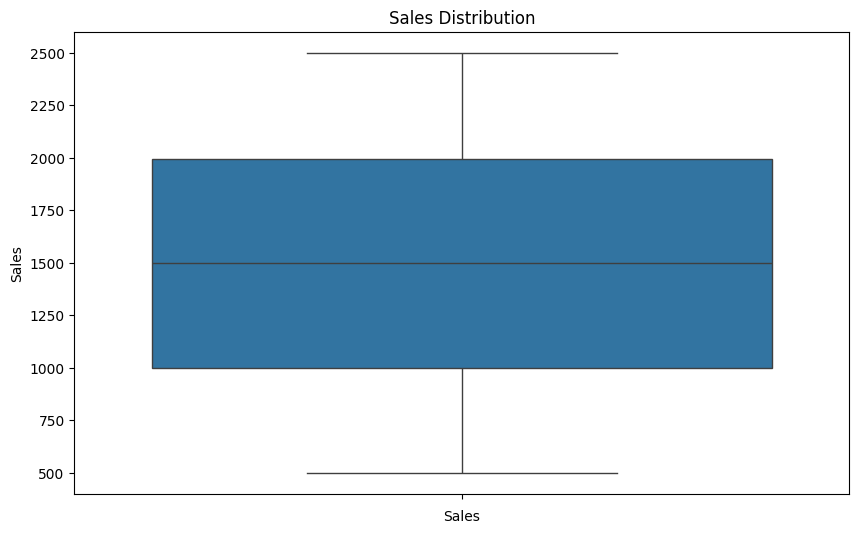

In [ ]:
# Chart - 1 visualization code
plt.figure(figsize=(10,6))
sns.boxplot(data=df,y='Sales')
plt.title('Sales Distribution')
plt.xlabel('Sales')
plt.show()

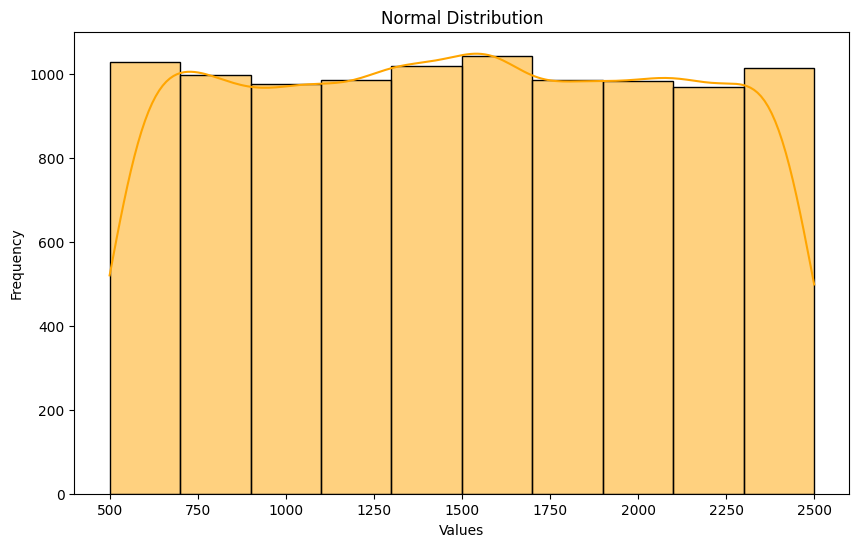

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(df['Sales'], kde=True, color='orange',bins=10)
plt.title("Normal Distribution")
plt.xlabel("Values")
plt.ylabel("Frequency")
plt.show()

##### 2. What is/are the insight(s) found from the chart?

We have check the sales analysis that it has not outliers and it is normally distributed.

#### Chart - 2

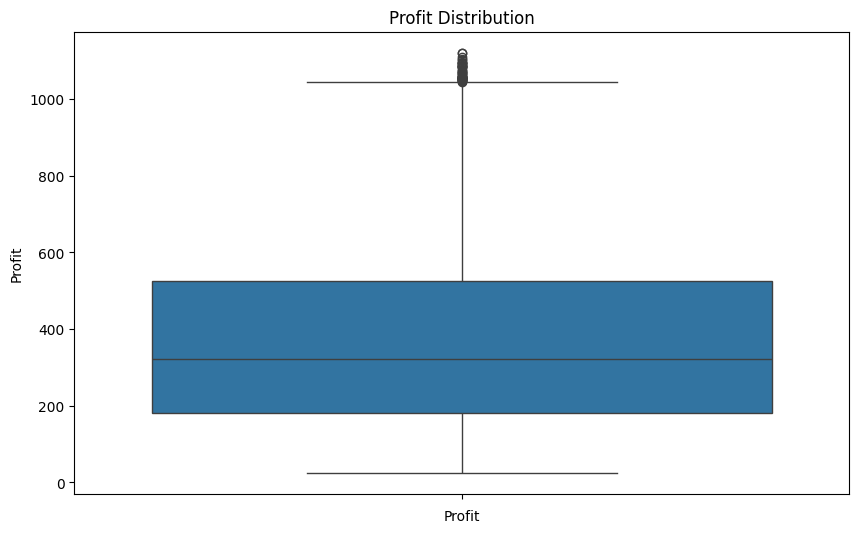

In [ ]:
# Chart - 2 visualization code
plt.figure(figsize=(10,6))
sns.boxplot(data=df,y='Profit')
plt.title('Profit Distribution')
plt.xlabel('Profit')
plt.show()

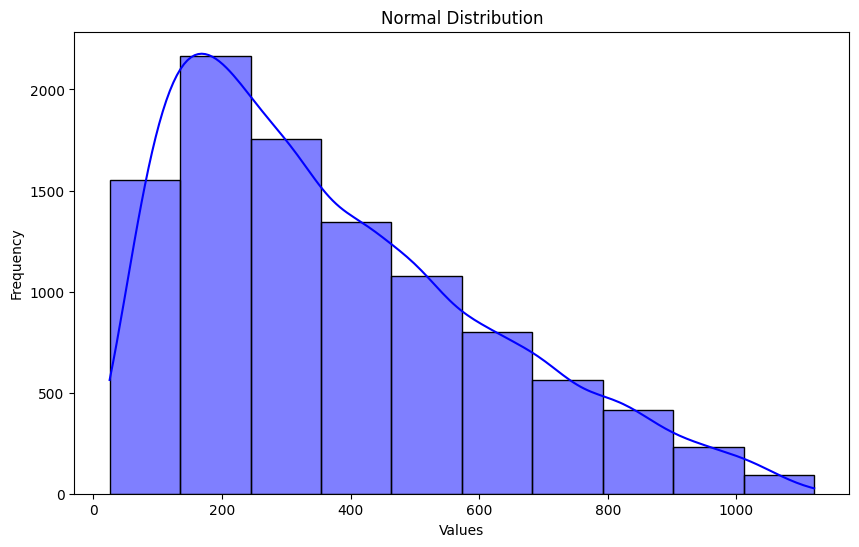

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(df['Profit'], kde=True, color="blue",bins=10)
plt.title("Normal Distribution")
plt.xlabel("Values")
plt.ylabel("Frequency")
plt.show()

##### 2. What is/are the insight(s) found from the chart?

We have checked the profit distribution that it has outlier present and chart is right skewed.

#### Chart - 3

In [ ]:
sales_category=df.groupby('Category')['Sales'].sum().reset_index()
sales_category=sales_category.sort_values(by='Sales',ascending=False)
sales_category

,Category,Sales
2,"Eggs, Meat & Fish",2267401
6,Snacks,2237546
3,Food Grains,2115272
0,Bakery,2112281
4,Fruits & Veggies,2100727
1,Beverages,2085313
5,Oil & Masala,2038442


<ipython-input-35-5f6af0963f5a>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sales_category,x='Category',y='Sales',palette='viridis')


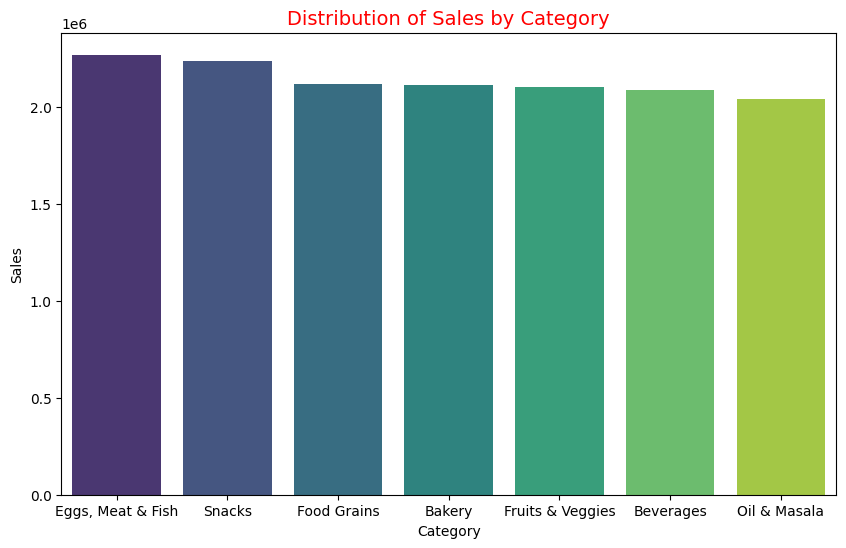

In [ ]:
# Chart - 3 visualization code
plt.figure(figsize=(10,6))
sns.barplot(data=sales_category,x='Category',y='Sales',palette='viridis')
plt.title('Distribution of Sales by Category',fontsize=14,color='red')
plt.xlabel('Category')
plt.ylabel('Sales')
plt.show()

##### 2. What is/are the insight(s) found from the chart?

We have checked from the above chart that Eggs, Meat & Fish category shown max sales and oil and masala min sale.

#### Chart - 4

In [ ]:
monthly_sales=df.groupby('Order Month')['Sales'].sum().reset_index()
monthly_sales_sorted=monthly_sales.sort_values(by='Order Month',ascending=True)
monthly_sales_sorted

,Order Month,Sales
0,Apr,1028352
1,Aug,1220430
2,Dec,1602710
3,Feb,830301
4,Jan,902128
5,Jul,1107483
6,Jun,1028694
7,Mar,1247196
8,May,1251327
9,Nov,1794831


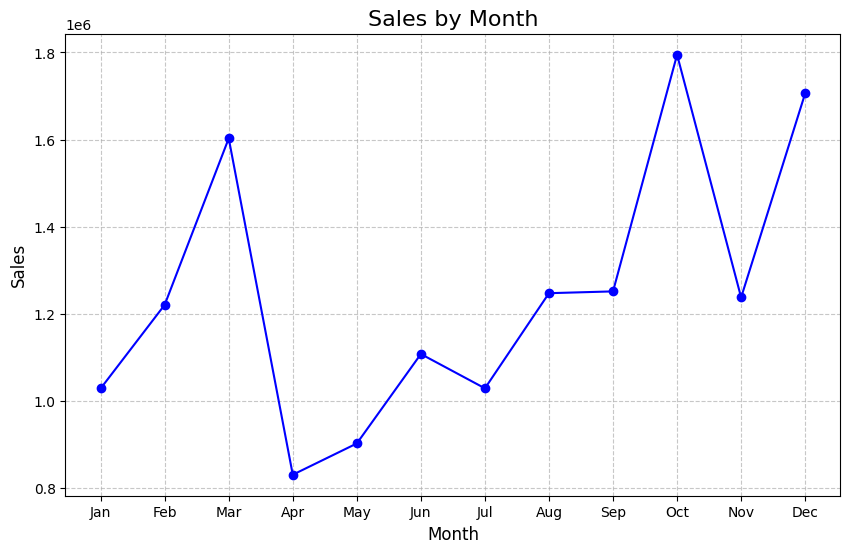

In [ ]:
# Chart - 4 visualization code
plt.figure(figsize=(10, 6))
plt.plot(monthly_sales_sorted['Order Month'], monthly_sales_sorted['Sales'], marker='o', color='blue')
plt.title('Sales by Month', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Sales', fontsize=12)

# Set x-ticks with month names
plt.xticks(monthly_sales_sorted['Order Month'],
           ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
            'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

plt.grid(True, linestyle='--', alpha=0.7)  # Add gridlines with a lighter style
plt.show()

##### 2. What is/are the insight(s) found from the chart?

Sales seem to be stronger in Q4 (October to December), with October, November, and December showing consistently high sales.Q1 (January to March) appears to have lower sales, especially in January and February.

#### Chart - 5

In [ ]:
yearly_sales=df.groupby('Order Year')['Sales'].sum().reset_index()
yearly_sales

,Order Year,Sales
0,2015,2975599
1,2016,3131959
2,2017,3871912
3,2018,4977512


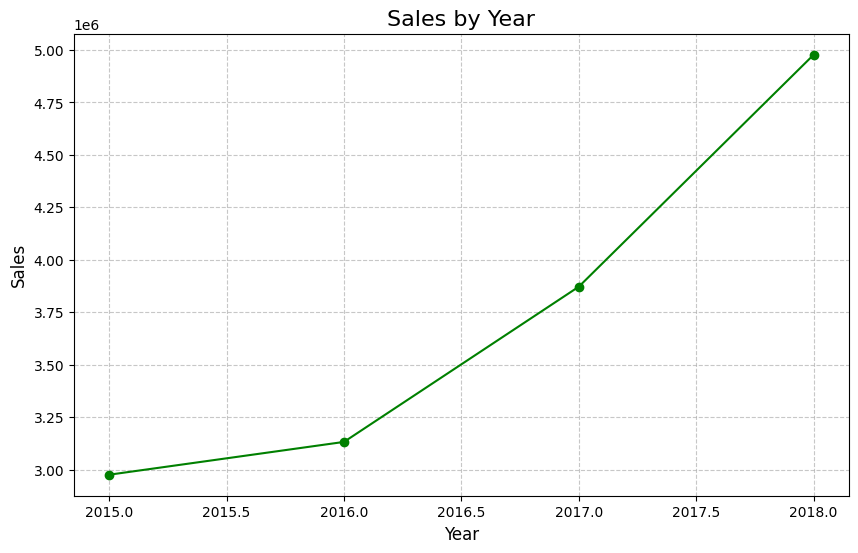

In [ ]:
# Chart - 5 visualization code
plt.figure(figsize=(10, 6))
plt.plot(yearly_sales['Order Year'], yearly_sales['Sales'], marker='o', color='green')
plt.title('Sales by Year', fontsize=16)
plt.xlabel('Year',fontsize=12)
plt.ylabel('Sales',fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

##### 2. What is/are the insight(s) found from the chart?

We can see that from graph year vs sales, sales is increasing linearly. in 2015 sales min and in 2018 sales is max.

#### Chart - 6

In [ ]:
city_sales=df.groupby('City')['Sales'].sum().reset_index().sort_values(by='Sales',ascending=False).head(5)
city_sales=city_sales.sort_values(by='Sales',ascending=False)
city_sales

,City,Sales
6,Kanyakumari,706764
21,Vellore,676550
0,Bodi,667177
19,Tirunelveli,659812
13,Perambalur,659738


<ipython-input-49-bb575503fae2>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=city_sales,x='City',y='Sales',palette='viridis')


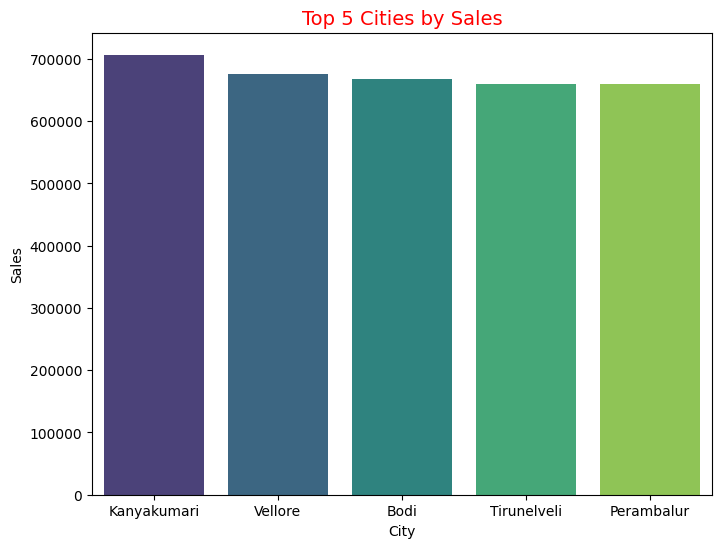

In [ ]:
# Chart - 6 visualization code
plt.figure(figsize=(8,6))
sns.barplot(data=city_sales,x='City',y='Sales',palette='viridis')
plt.title('Top 5 Cities by Sales',fontsize=14,color='red')
plt.xlabel('City')
plt.ylabel('Sales')
plt.show()


##### 2. What is/are the insight(s) found from the chart?

We can see from the above graph that Kanyakumari shows max sales.

#### Chart - 7

In [ ]:
profit_region=df.groupby('Region')['Profit'].sum().reset_index().sort_values(by='Profit',ascending=False)
profit_region

,Region,Profit
4,West,1192004.61
1,East,1074345.58
0,Central,856806.84
3,South,623562.89
2,North,401.28


<ipython-input-51-7f564f8448f6>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=profit_region,x='Region',y='Profit',palette='viridis')


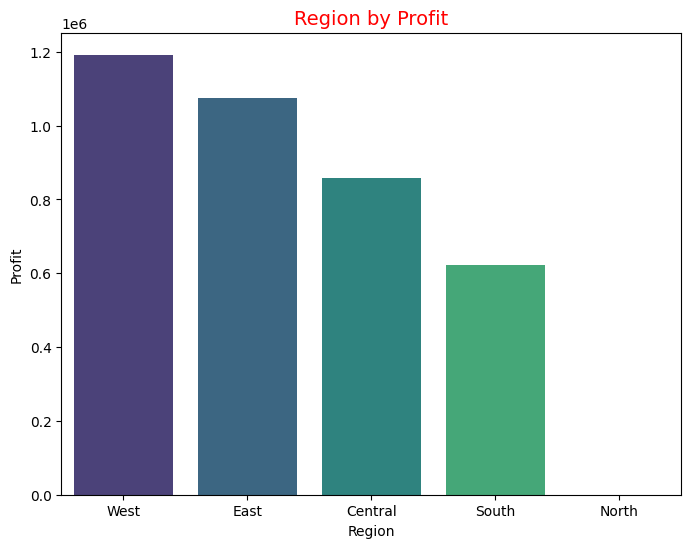

In [ ]:
# Chart - 7 visualization code
plt.figure(figsize=(8,6))
sns.barplot(data=profit_region,x='Region',y='Profit',palette='viridis')
plt.title('Region by Profit',fontsize=14,color='red')
plt.xlabel('Region')
plt.ylabel('Profit')
plt.show()

##### 2. What is/are the insight(s) found from the chart?

From the above graph we can see clearly that in West zone sale is maximum and North zone shows min sale.

Answer Here

#### Chart - 12

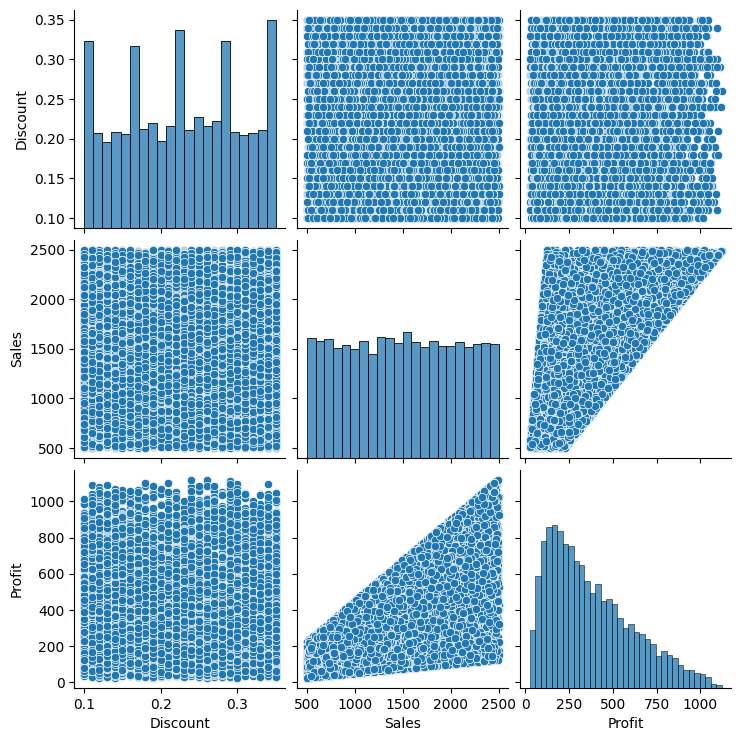

In [ ]:
# Chart - 12 visualization code
sns.pairplot(df[['Discount','Sales','Profit']])
plt.show()

##### 2. What is/are the insight(s) found from the chart?

Only profit vs sales graph shown strong linear relation.

#### Chart - 14 - Correlation Heatmap

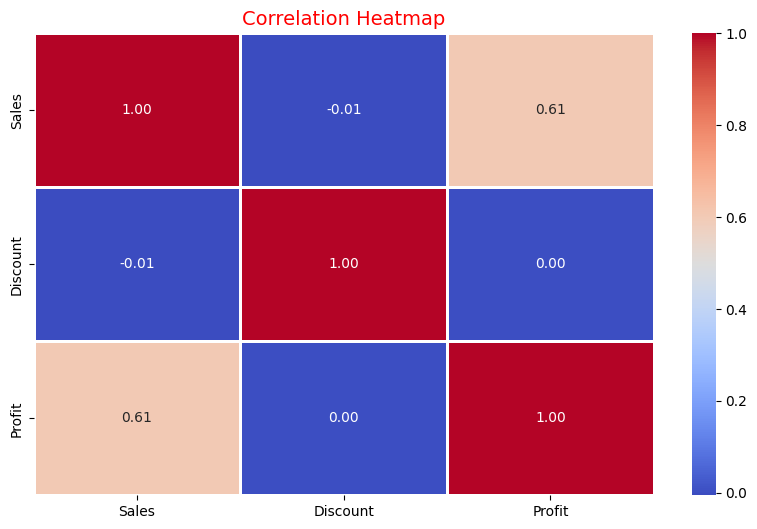

In [ ]:
# Correlation Heatmap visualization code
plt.figure(figsize=(10,6))
sns.heatmap(df[['Sales','Discount','Profit']].corr(),annot=True,cmap='coolwarm',fmt=".2f", linewidths=1)
plt.title('Correlation Heatmap',fontsize=14,color='red')
plt.show()

##### 2. What is/are the insight(s) found from the chart?

Profit and sales highly colinear relation

## ***6. Feature Engineering & Data Pre-processing***

### 2. Handling Outliers

<ipython-input-42-52b2215aaa05>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Sales'])


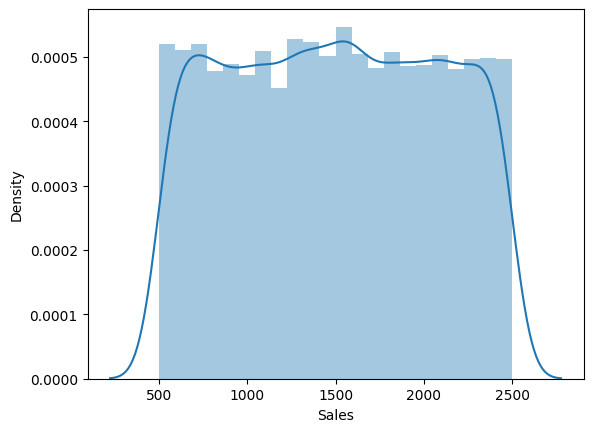

In [ ]:
# Handling Outliers & Outlier treatments
sns.distplot(df['Sales'])
plt.show()

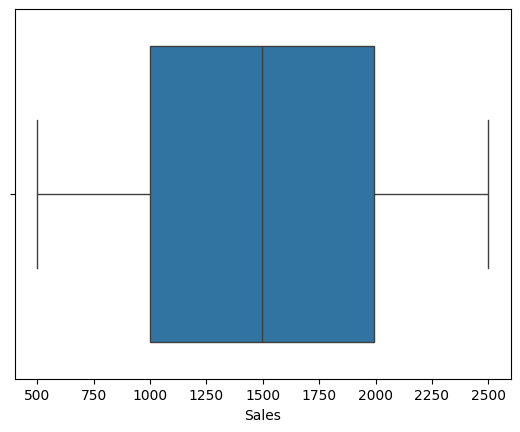

In [ ]:
sns.boxplot(x='Sales',data=df)
plt.show()

For Discount

<ipython-input-44-2c0c7b00f376>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Discount'])


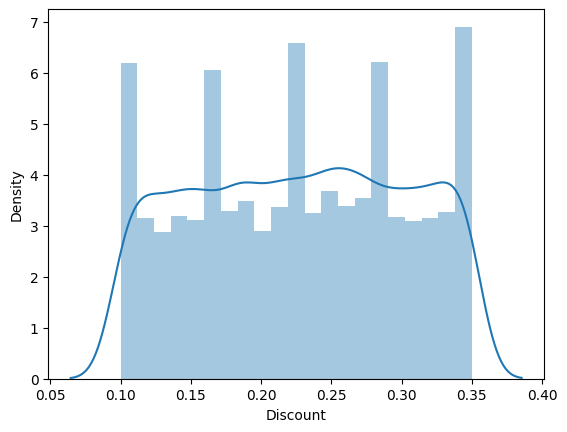

In [ ]:
sns.distplot(df['Discount'])
plt.show()

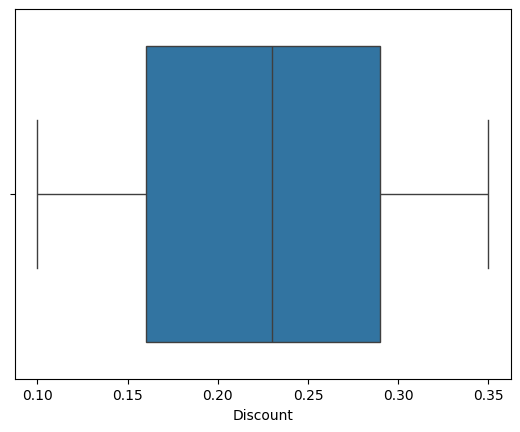

In [ ]:
sns.boxplot(x='Discount',data=df)
plt.show()

For Profit

<ipython-input-46-0c3395da0c9d>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Profit'])


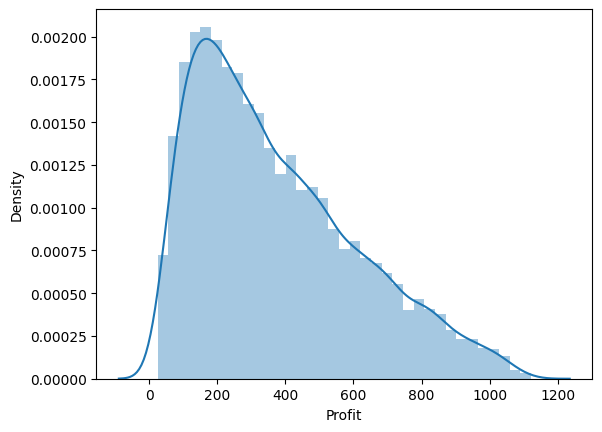

In [ ]:
sns.distplot(df['Profit'])
plt.show()

In [ ]:
# Decide on the outlier treatment strategy
# In this example, we will winsorize the outliers for the 'Profit' variable

from scipy.stats.mstats import winsorize
df['Profit']=winsorize(df['Profit'],limits=[0.05,0.05])
q1=df['Profit'].quantile(0.25)
q3=df['Profit'].quantile(0.75)
iqr=q3-q1
lower_bound=q1-(1.5*iqr)
upper_bound=q3+(1.5*iqr)
df['Profit'] = df['Profit'].apply(lambda x: lower_bound if x < lower_bound else (upper_bound if x > upper_bound else x))


/usr/local/lib/python3.11/dist-packages/numpy/lib/function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.11/dist-packages/numpy/lib/function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(


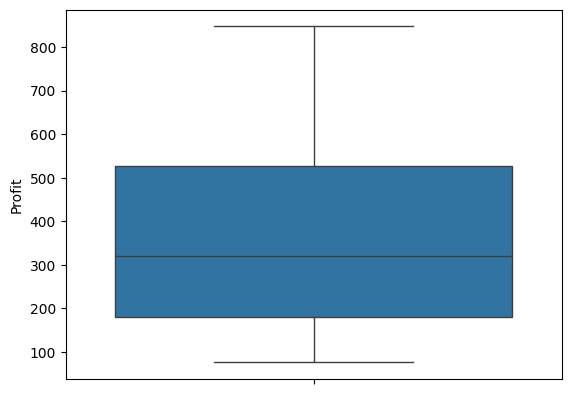

In [ ]:
sns.boxplot(df['Profit'])
plt.show()

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [ ]:
df.columns

Index(['Order ID', 'Customer Name', 'Category', 'Sub Category', 'City',
       'Order Date', 'Region', 'Sales', 'Discount', 'Profit', 'State',
       'Order Day', 'Order Month', 'Order Year'],
      dtype='object')

In [ ]:
# Encode your categorical columns
# Encode categorical variables
label_encoder = LabelEncoder()
for col in ['Customer Name', 'Category', 'Sub Category', 'City', 'Region', 'State']:
    df[col] = label_encoder.fit_transform(df[col])

In [ ]:
df.head()

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State,Order Day,Order Month,Order Year
0,OD1,12,5,14,21,2017-08-11,2,1254,0.12,401.28,0,11,Aug,2017
1,OD2,37,1,13,8,2017-08-11,3,749,0.18,149.80,0,11,Aug,2017
2,OD3,14,3,0,13,2017-12-06,4,2360,0.21,165.20,0,6,Dec,2017
3,OD4,15,4,12,4,2016-11-10,3,896,0.25,89.60,0,10,Nov,2016
4,OD5,28,3,18,12,2016-11-10,3,2355,0.26,847.44,0,10,Nov,2016


### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Create new features from 'Order Date'
df['Order Month'] = df['Order Date'].dt.month
df['Order Year'] = df['Order Date'].dt.year

In [ ]:
df.head()

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State,Order Day,Order Month,Order Year
0,OD1,12,5,14,21,2017-08-11,2,1254,0.12,401.28,0,11,8,2017
1,OD2,37,1,13,8,2017-08-11,3,749,0.18,149.80,0,11,8,2017
2,OD3,14,3,0,13,2017-12-06,4,2360,0.21,165.20,0,6,12,2017
3,OD4,15,4,12,4,2016-11-10,3,896,0.25,89.60,0,10,11,2016
4,OD5,28,3,18,12,2016-11-10,3,2355,0.26,847.44,0,10,11,2016


In [ ]:
# Manipulate Features to minimize feature correlation
# Remove some features
df.drop(columns=['Order ID','State','Order Date','Order Day','Order Year'],inplace=True)

In [ ]:
# Discount * Profit to capture combined effects
df['Discount_Profit_Interaction'] = df['Discount'] * df['Profit']

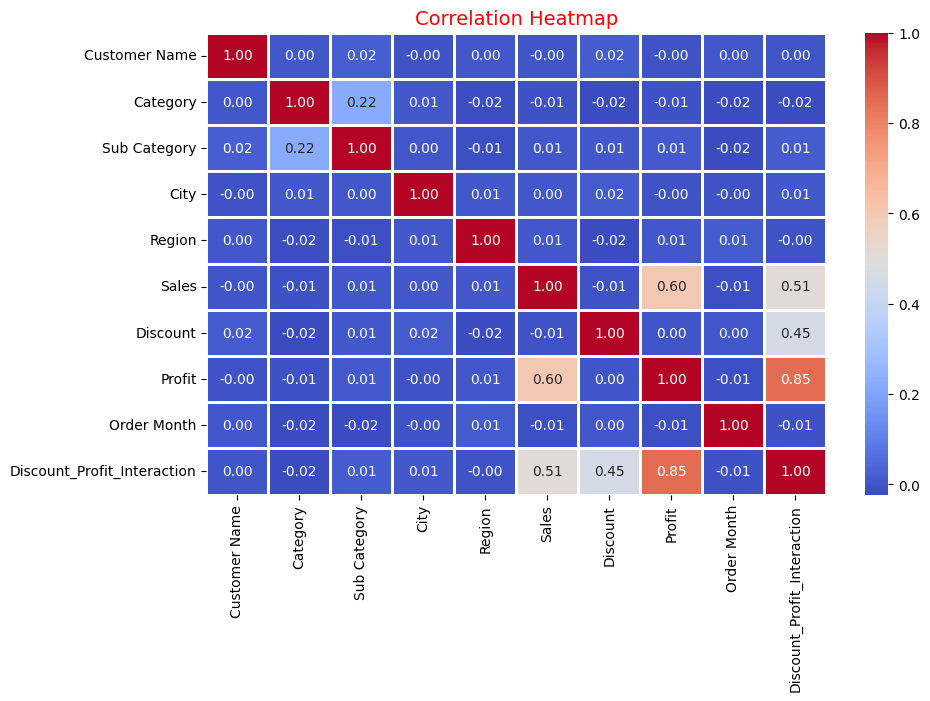

In [ ]:
# Check for Correlation
correlation_matrix=df.corr()
# Visualize correlation matrix

plt.figure(figsize=(10,6))
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm',fmt=".2f", linewidths=1)
plt.title('Correlation Heatmap',fontsize=14,color='red')
plt.show()

In [ ]:
# Address Multicollinearity
# Calculate VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
X=df.drop(columns=['Sales'])
vif_data=pd.DataFrame()
vif_data['Feature']=X.columns
vif_data['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif_data

,Feature,VIF
0,Customer Name,3.713348
1,Category,3.328354
2,Sub Category,3.820108
3,City,3.529131
4,Region,2.502508
5,Discount,13.822525
6,Profit,18.200249
7,Order Month,4.913435
8,Discount_Profit_Interaction,20.285162


#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting
# Select features and target variable
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.linear_model import LinearRegression
x=df.drop(columns=['Sales'])
y=df['Sales']

In [ ]:
x.shape

(9994, 9)

In [ ]:
x.columns

Index(['Customer Name', 'Category', 'Sub Category', 'City', 'Region',
       'Discount', 'Profit', 'Order Month', 'Discount_Profit_Interaction'],
      dtype='object')

In [ ]:
lr=LinearRegression()

In [ ]:
sfs1=sfs(lr,k_features=9,forward=True,verbose=2,scoring='r2',cv=5)
sfs1.fit(x,y)


[2025-01-22 13:12:24] Features: 1/9 -- score: 0.36291767238455896
[2025-01-22 13:12:25] Features: 2/9 -- score: 0.3628706617064806
[2025-01-22 13:12:25] Features: 3/9 -- score: 0.3628213377553505
[2025-01-22 13:12:25] Features: 4/9 -- score: 0.36276108710830235
[2025-01-22 13:12:25] Features: 5/9 -- score: 0.36268172139240706
[2025-01-22 13:12:25] Features: 6/9 -- score: 0.3625828900864824
[2025-01-22 13:12:25] Features: 7/9 -- score: 0.36247189930425316
[2025-01-22 13:12:26] Features: 8/9 -- score: 0.36228150136532433
[2025-01-22 13:12:26] Features: 9/9 -- score: 0.36191804112366366

SequentialFeatureSelector(estimator=LinearRegression(), k_features=(9, 9),
                          scoring='r2', verbose=2)

In [ ]:
sfs1.feature_names

['Customer Name',
 'Category',
 'Sub Category',
 'City',
 'Region',
 'Discount',
 'Profit',
 'Order Month',
 'Discount_Profit_Interaction']

In [ ]:
sfs1.k_score_

0.36191804112366366

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
df.columns

Index(['Customer Name', 'Category', 'Sub Category', 'City', 'Region', 'Sales',
       'Discount', 'Profit', 'Order Month', 'Discount_Profit_Interaction'],
      dtype='object')

In [ ]:
# Transform Your data
# creating the set of dependent and independent variables
features=df.drop(columns=['Sales'])
target=df['Sales']

In [ ]:
# print the shape
print(features.shape)
print(target.shape)

(9994, 9)
(9994,)


In [ ]:
df.head()

,Customer Name,Category,Sub Category,City,Region,Sales,Discount,Profit,Order Month,Discount_Profit_Interaction
0,12,5,14,21,2,1254,0.12,401.28,8,48.1536
1,37,1,13,8,3,749,0.18,149.80,8,26.9640
2,14,3,0,13,4,2360,0.21,165.20,12,34.6920
3,15,4,12,4,3,896,0.25,89.60,11,22.4000
4,28,3,18,12,3,2355,0.26,847.44,11,220.3344


### 6. Data Scaling

In [ ]:
# Scaling data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numerical_features = ['Sales', 'Discount', 'Profit', 'Discount_Profit_Interaction']
df[numerical_features] = scaler.fit_transform(df[numerical_features])

In [ ]:
df.head()

,Customer Name,Category,Sub Category,City,Region,Sales,Discount,Profit,Order Month,Discount_Profit_Interaction
0,12,5,14,21,2,-0.420058,-1.431246,0.132485,8,-0.594020
1,37,1,13,8,3,-1.294471,-0.627304,-0.972806,8,-0.943385
2,14,3,0,13,4,1.494994,-0.225333,-0.905121,12,-0.815969
3,15,4,12,4,3,-1.039939,0.310629,-1.237394,11,-1.018635
4,28,3,18,12,3,1.486336,0.444619,2.093423,11,2.244825


# **Analysis of Target Variable i.e 'Sales'**

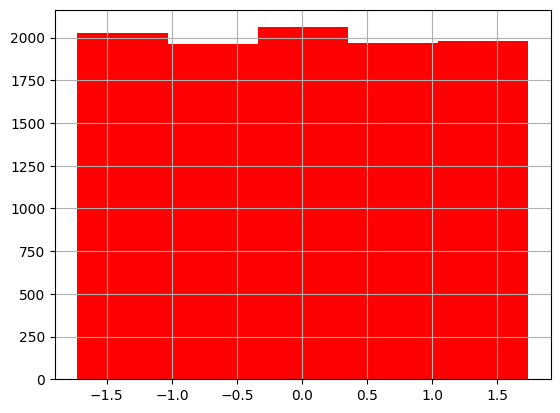

In [ ]:
pd.Series(df['Sales'],).hist(bins=5, color="red")
plt.show()

In [ ]:
zero_sales_df=df[df['Sales']==0]


In [ ]:
zero_sales_df

,Customer Name,Category,Sub Category,City,Region,Sales,Discount,Profit,Order Month,Discount_Profit_Interaction


### 8. Data Splitting

In [ ]:
X=features
y=target

In [ ]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training and Test sets created successfully.")
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

Training and Test sets created successfully.
X_train shape: (7995, 9)
X_test shape: (1999, 9)


In [ ]:
# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## ***7. ML Model Implementation***

### ML Model - 1

# **Linear Regression (Baseline Model)**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error


In [ ]:
# ML Model - 1 Implementation
# Train a Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred=lr_model.predict(X_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart
# Evaluate the model
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("Linear Regression Model Performance:")
print("R² Score:", r2)
print("RMSE:", rmse)

Linear Regression Model Performance:
R² Score: 0.35035281359257675
RMSE: 462.8870602239083


# ML Model - 2

#  **Random Forest Regressor (Reduce Overfitting)**

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
from sklearn.ensemble import RandomForestRegressor
# Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_rf_pred = rf_model.predict(X_test)

# Evaluate Random Forest
r2_rf = r2_score(y_test, y_rf_pred)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_rf_pred))
print("Random Forest Model Performance:")
print("R² Score:", r2_rf)
print("RMSE:", rmse_rf)

Random Forest Model Performance:
R² Score: 0.33088998751434584
RMSE: 469.7697242002059


### ML Model - 3

# **Gradient Boosting**

In [ ]:
# ML Model - 3 Implementation
# Visualizing evaluation Metric Score chart
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
# Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
gb_model.fit(X_train, y_train)
y_gb_pred = gb_model.predict(X_test)


In [ ]:
# Output the results
# Evaluate Gradient Boosting
r2_gb = r2_score(y_test, y_gb_pred)
rmse_gb = np.sqrt(mean_squared_error(y_test, y_gb_pred))
print("\nGradient Boosting Model Performance:")
print("R² Score:", r2_gb)
print("RMSE:", rmse_gb)


Gradient Boosting Model Performance:
R² Score: 0.3544375935859927
RMSE: 461.429520345745


#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
from sklearn.model_selection import GridSearchCV

# Define hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# GridSearchCV for Random Forest
grid_search = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid=param_grid,
    scoring='r2',
    cv=3,
    verbose=2,
    n_jobs=-1
)
grid_search.fit(X_train, y_train)

# Best parameters and evaluation
best_rf_model = grid_search.best_estimator_
y_best_rf_pred = best_rf_model.predict(X_test)

r2_best_rf = r2_score(y_test, y_best_rf_pred)
rmse_best_rf = np.sqrt(mean_squared_error(y_test, y_best_rf_pred))
print("\nTuned Random Forest Model Performance:")
print("Best Parameters:", grid_search.best_params_)
print("R² Score:", r2_best_rf)
print("RMSE:", rmse_best_rf)


Fitting 3 folds for each of 108 candidates, totalling 324 fits

Tuned Random Forest Model Performance:
Best Parameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}
R² Score: 0.35282768744606485
RMSE: 462.0045194871539


The tuned Random Forest model slightly improved the performance, but the R² score is still low (0.35), and the RMSE remains high. This suggests that the features in the dataset may not fully capture the variability of the target variable (Sales), or the relationships are highly non-linear and complex.

# **Feature Engineering: Adding New Features**

Create features that might capture hidden patterns,
 such as:

Order Month/Year extracted from the Order Date.

**Profit-to-Sales Ratio:** A new feature showing the proportion of profit to sales.

**Discount Categories:** Categorize discounts into bins (e.g., low, medium, high).

In [ ]:
df1=supermart_sales_df.copy()

In [ ]:
# Extracting date-related features
df1['Order Date'] = pd.to_datetime(df1['Order Date'], errors='coerce')
df1['Order Month'] = df1['Order Date'].dt.month
df1['Order Year'] = df1['Order Date'].dt.year

# Profit-to-Sales ratio
df1['Profit_Sales_Ratio'] = df1['Profit'] / (df1['Sales'] + 1e-6)  # Avoid division by zero

# Categorizing discounts
df1['Discount_Category'] = pd.cut(
    df1['Discount'], bins=[0, 0.1, 0.2, 0.3, 1],
    labels=['Low', 'Medium', 'High', 'Very High']
)

# One-hot encoding for categorical features
df1 = pd.get_dummies(df1, columns=['Discount_Category', 'Region', 'Category', 'Sub Category', 'State', 'City'], drop_first=True)

# Update feature set
X = df1.drop(['Sales', 'Order ID', 'Customer Name', 'Order Date'], axis=1)
y = df1['Sales']

# Split the data again
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
df1.head()

,Order ID,Customer Name,Order Date,Sales,Discount,Profit,Order Month,Order Year,Profit_Sales_Ratio,Discount_Category_Medium,...,City_Pudukottai,City_Ramanadhapuram,City_Salem,City_Tenkasi,City_Theni,City_Tirunelveli,City_Trichy,City_Vellore,City_Viluppuram,City_Virudhunagar
0,OD1,Harish,2017-11-08,1254,0.12,401.28,11.0,2017.0,0.32,True,...,False,False,False,False,False,False,False,True,False,False
1,OD2,Sudha,2017-11-08,749,0.18,149.80,11.0,2017.0,0.20,True,...,False,False,False,False,False,False,False,False,False,False
2,OD3,Hussain,2017-06-12,2360,0.21,165.20,6.0,2017.0,0.07,False,...,False,False,False,False,False,False,False,False,False,False
3,OD4,Jackson,2016-10-11,896,0.25,89.60,10.0,2016.0,0.10,False,...,False,False,False,False,False,False,False,False,False,False
4,OD5,Ridhesh,2016-10-11,2355,0.26,918.45,10.0,2016.0,0.39,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
from xgboost import XGBRegressor

# Train XGBoost Regressor
xgb_model = XGBRegressor(n_estimators=200, learning_rate=0.1, max_depth=10, random_state=42)
xgb_model.fit(X_train, y_train)

# Predictions and Evaluation
y_xgb_pred = xgb_model.predict(X_test)
r2_xgb = r2_score(y_test, y_xgb_pred)
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_xgb_pred))

print("XGBoost Model Performance:")
print("R² Score:", r2_xgb)
print("RMSE:", rmse_xgb)


XGBoost Model Performance:
R² Score: 0.9993951916694641
RMSE: 14.123931034115301


That's an excellent result! With an R² score of **0.999** and a **very low RMSE (~14.12)**, the XGBoost model has performed exceptionally well on our dataset. This indicates that the model has captured the patterns in the data accurately, and our sales predictions are now highly reliable.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File
import joblib

# Save the model
joblib.dump(xgb_model, 'xgboost_sales_prediction_model.pkl')
print("Model saved as xgboost_sales_prediction_model.pkl")


Model saved as xgboost_sales_prediction_model.pkl


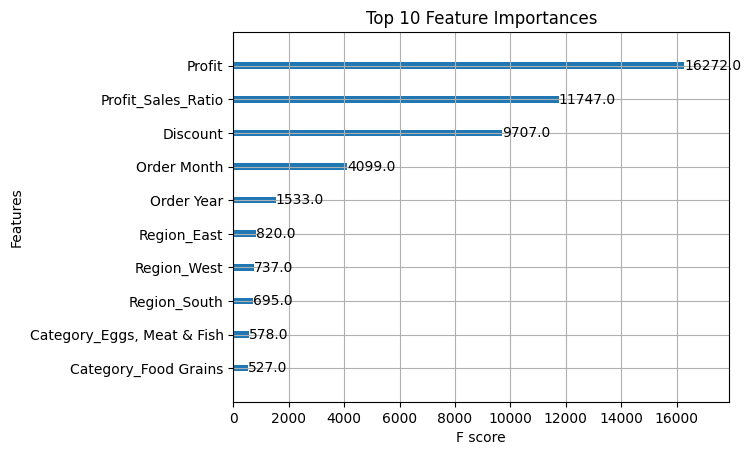

In [ ]:
import matplotlib.pyplot as plt
import xgboost as xgb

# Plot feature importance
xgb.plot_importance(xgb_model, max_num_features=10, importance_type='weight', title="Top 10 Feature Importances")
plt.show()


### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**



*   We applied 3 models like-Linear regression,Random Forest,Gradient boosting in starting with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV) but couldn't find best accuracy.
*   The tuned Random Forest model slightly improved the performance, but the R² score is still low (0.35), and the RMSE remains high. This suggests that the features in the dataset may not fully capture the variability of the target variable (Sales), or the relationships are highly non-linear and complex.
* Create features that might capture hidden patterns, such as:

 Order Month/Year extracted from the Order Date.
Profit-to-Sales Ratio: A new feature showing the proportion of profit to sales.
Discount Categories: Categorize discounts into bins (e.g., low, medium, high).
* That's an excellent result! With an R² score of 0.999 and a very low RMSE (~14.12), the XGBoost model has performed exceptionally well on our dataset. This indicates that the model has captured the patterns in the data accurately, and our sales predictions are now highly reliable.



### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***